In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv('Visadataset.csv')
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Boxplot**

- Boxplot is used to identify the outliers

- Outlier is an observation having huge positive or huge negative value

- Q1=25p, Q2=50p and Q3=75p

- IQR= Inter quartile range= Q3-Q1

- Q3+1.5*IQR and Q1-1.5*IQR

In [4]:
wage_data=visa_df['prevailing_wage']

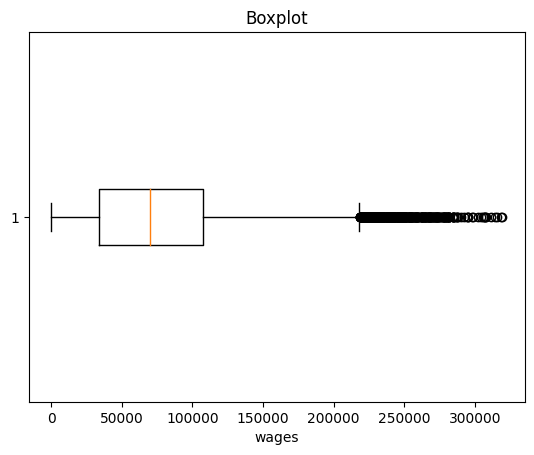

In [5]:
plt.boxplot(wage_data,vert=False)
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

Text(0.5, 1.0, 'Boxplot')

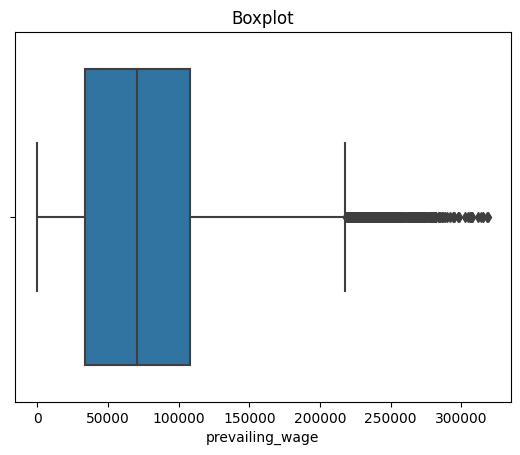

In [6]:
sns.boxplot(x=wage_data)
plt.title('Boxplot')

**Plot the histogram and boxplot side by side**

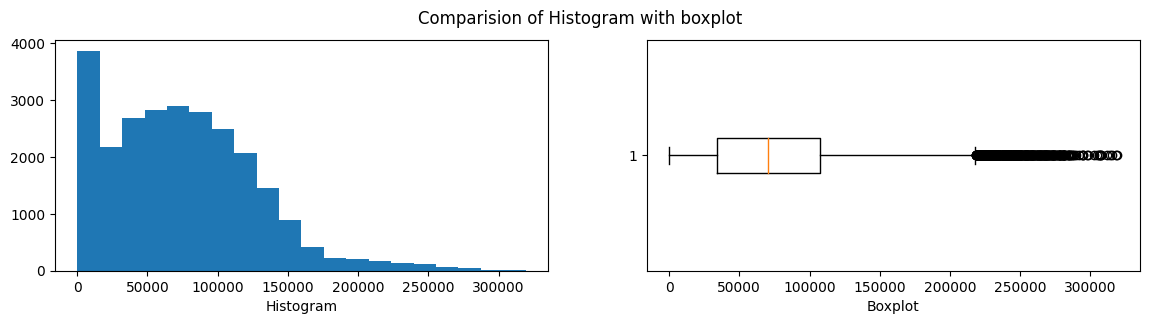

In [7]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('Boxplot')
plt.show()

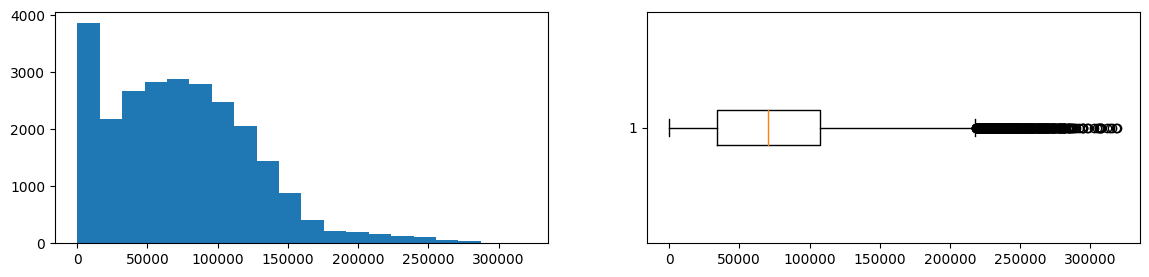

In [8]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.show()

**Finding the outliers**

- We already know that outliers available less than 1-1.5*IQR and Q3+1.5*IQR

- step-1:
 
  - Calculate Q1=25p
  
  - Calculate Q2=50p
  
  - Calculate Q3=75p
   

- step-2:

  - calculate IQR=Q3-Q1
  
- step-3:
  
  - calculate LB= Q1-1.5*IQR
  
  - calculate UB= Q3+1.5*IQR

- step-4:
  
  - con1=wage<LB
                 
  - con2=wage>UB
    
  - con3= con1 & ,or con2(use bitwise operator and-&,or-|)

- step-5:
    
   - Data[con3]

In [9]:
#step-1
Q1=np.percentile(visa_df['prevailing_wage'],25)
print(Q1)
Q2=np.percentile(visa_df['prevailing_wage'],50)
print(Q2)
Q3=np.percentile(visa_df['prevailing_wage'],75)
print(Q3)

# step-2

IQR=Q3-Q1
print(IQR)

# step-3
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
print(LB,UB)

# step-3
con1=wage_data<LB
con2=wage_data>UB
con3=con1|con2
#step-5
wage_data[con3]

# bitwise operators used to compare 
# bit data=====0 and 1==true false

34015.479999999996
70308.20999999999
107735.51250000001
73720.03250000002
-76564.56875000002 218315.56125000003


14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [10]:
outliers_df=visa_df[con3]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [12]:

Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

IQR=Q3-Q1

LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
print(LB,UB)

# step-3
cond1=wage_data>LB
cond2=wage_data<UB
cond3=cond1&cond2
#step-5
non_outliers_df=visa_df[cond3]
non_outliers_df

-76564.56875000002 218315.56125000003


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [13]:
wage_data[cond3]

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

- we have two data frame 

- visa_df: Total data 25480

- non_outlier_df=After removing outliers 25053

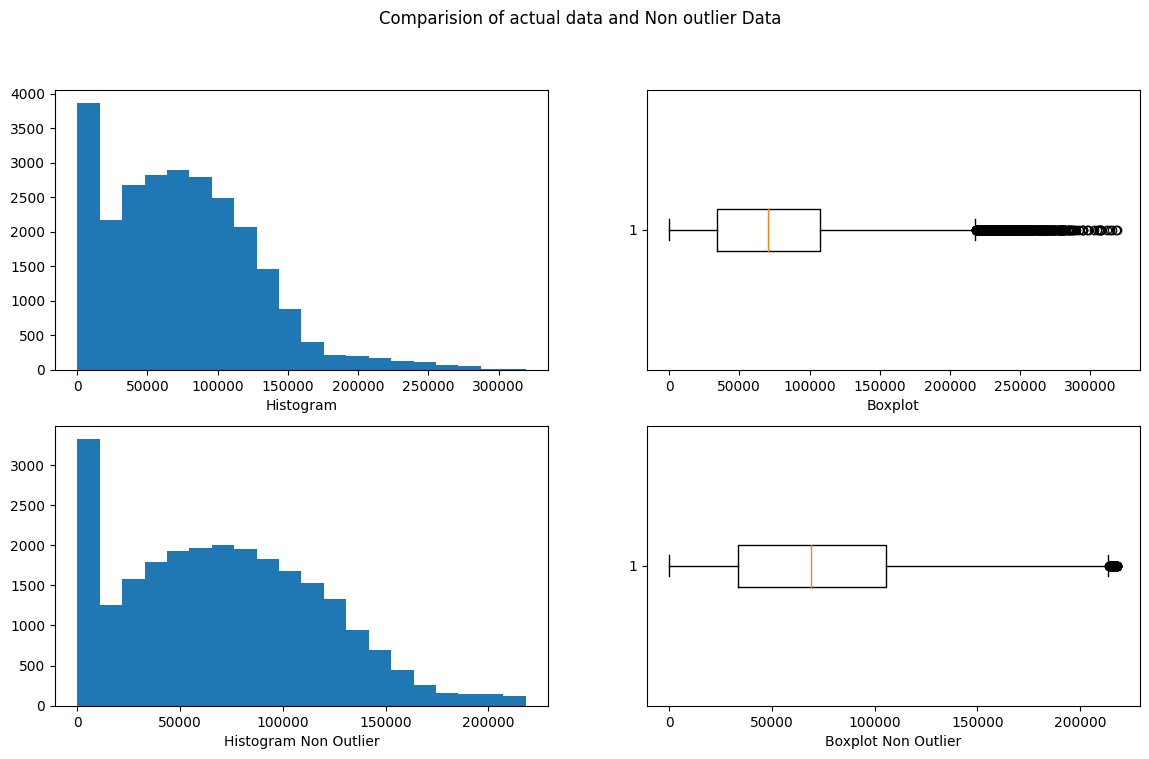

In [15]:
plt.figure(figsize=(14,8))
plt.suptitle('Comparision of actual data and Non outlier Data')
plt.subplot(2,2,1).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data,vert=False)
plt.xlabel('Boxplot')
# non_outlier graph
wage_data_non_outliers=non_outliers_df['prevailing_wage']
plt.subplot(2,2,3).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram Non Outlier')
plt.subplot(2,2,4).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('Boxplot Non Outlier')
plt.show()

In [ ]:
# Task: fill the out liers of wage data with wage median
# 427 outliers
# 427 shoud replace with median value
# again draw the plots

12/08/2024

- or behaviour:
    
    - suppose we take two individual conditions
    
    - if any one True, the final beacomes true

- and behaviour:
    
    - suppose we take two individual conditions
    
    - both conditions should be, the final becomes True

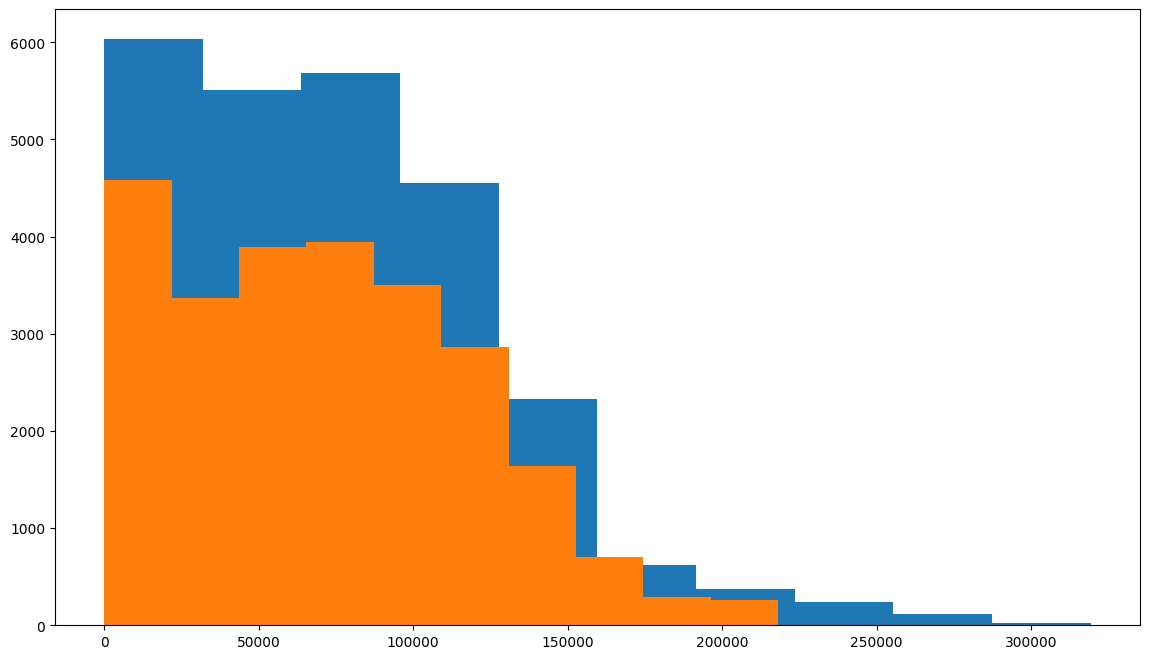

In [16]:
wage_data=visa_df['prevailing_wage']
wage_data_non_outliers=non_outliers_df['prevailing_wage']

plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers)
plt.show()

**How to treat outliers in data**

- **1.we can drop the outliers**
  
   - Droping outliers is an easy, but not recommended
   
   - If you drop the outliers we are droping the rows
   
   - which means we are droping the other column values also
   
   - May be some important information we might loose from other columns values
   
   - But in industry if outlier % is less than 2% of the total data, we can drop
   
   - The number of outliers in pwage is 427
   
   - The number of total observations are 25480
   
   - The percentage is 1.67 whcich is less than 2%
   
- **2. Fill with Median value**

   - We already know that outliers does not affect by median
   
   - So, it is the best practice to fill the outliers with median
   
- **3.Capping or Florring**

    - Instead of fill with median
    
    - We can fill with certain values
    
    - The outliers which are less than LB fill with LB value
    
    - The outlier which are greater than UB fill with UB value
    
- **Isolation Forest**
  
   - It is ML model used to find the outliers and anamolies

**Filling with Median Values**

**np.where**

- In numpy we have method called where

- It takes three arguments

   - 1. condition
   
   - 2. Value if condition is True
   
   - 3. Value if condition is False

- It is applicable for only binary, means if and else

In [18]:
# list1=[]
# for value in wage_data:
#     if value<LB or Value>UB:
#         median=wage_data.median()
#         list1.append(median)
#     else:
#         list1.append(value)

In [19]:
dict1={'sub':['DS','DE','CS'],'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,DS,100
1,DE,200
2,CS,300


In [21]:
# QN Replace marks with 1, which are greater than 100
l=[]
for i in df['marks']:
    if i>100:
        l.append(1)
    else:
        l.append(i)
        
df['New']=l
df

,sub,marks,New
0,DS,100,100
1,DE,200,1
2,CS,300,1


In [22]:
df['marks']=l
df

,sub,marks,New
0,DS,100,100
1,DE,1,1
2,CS,1,1


In [26]:
# np.where(<condition>,<True>,<False>)
condf=df['marks']>100
np.where(condf,1,df['marks'])
df['marks']=l
df

,sub,marks,New
0,DS,100,100
1,DE,1,1
2,CS,1,1


In [33]:
# Implement for the outliers
wage_data=visa_df['prevailing_wage']
ccon1=wage_data<LB
ccon2=wage_data>UB
ccon3=ccon1|ccon2
wage_med=wage_data.median()
l=np.where(ccon3,wage_med,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [28]:
visa_df['prevailing_wage_update']=l

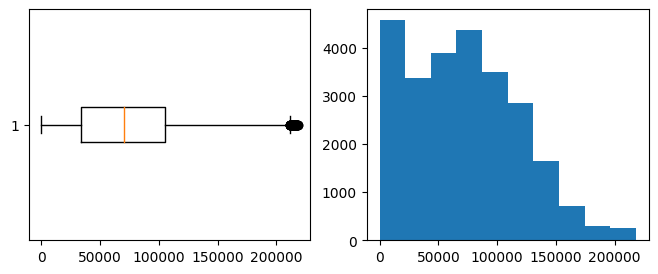

In [32]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'],vert=False)
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_update'])
plt.show()